# Desafio Grupo ZAP | Cientista de Dados
## Candidato: Marco Aurélio Moura Suriani
### Data: 18/07/2019

In [1]:
# Importando bibliotecas que serão utilizadas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

# 1) Leitura dos dados

**Resumo:**
* Arquivos json lidos como texto.
* Cada linha é um dicionário, que será transformado em uma instância de um DataFrame.
* Variáveis description e images não serão armazenadas, pois ocupam muita memória e não serão usadas neste trabalho.
* DataFrame salvo como arquivo csv para leitura rápida.

In [2]:
# Lê arquivos json como arquivos de text usando utf8.

dtst = open('source-4-ds-test.json', encoding="utf8")
dados_teste = dtst.readlines()
dtst.close()

dtrn = open('source-4-ds-train.json', encoding="utf8")
dados_treino = dtrn.readlines()
dtrn.close()

In [3]:
# Função que extrai o nome de cada variável dentro de um dicionário.
# Também fornece o nome dos dicionários que contém as variáveis (caminho).
# Exclui description e images.

def extrai_nomes(d):
    d = d.replace('false', "'false'").replace('null', "'null'").replace('true', "'true'")
    d = eval(d)
    
    nomes_colunas = list(d.keys())
    nomes_caminhos = []
    for n in nomes_colunas:
        nomes_caminhos.append([n])
        
    col_num = nomes_colunas.index('description')
    nomes_colunas.remove(nomes_colunas[col_num])
    nomes_caminhos.remove(nomes_caminhos[col_num])
    
    col_num = nomes_colunas.index('images')
    nomes_colunas.remove(nomes_colunas[col_num])
    nomes_caminhos.remove(nomes_caminhos[col_num])
    
    col_num = nomes_colunas.index('address')
    nomes_colunas.remove(nomes_colunas[col_num])
    nomes_caminhos.remove(nomes_caminhos[col_num])
    for col_nom in reversed(list(d['address'].keys())):
        nomes_colunas.insert(col_num, col_nom)
        nomes_caminhos.insert(col_num, ['address', col_nom])
    
    col_num = nomes_colunas.index('geoLocation')
    nomes_colunas.remove(nomes_colunas[col_num])
    nomes_caminhos.remove(nomes_caminhos[col_num])
    for col_nom in reversed(list(d['address']['geoLocation'].keys())):
        nomes_colunas.insert(col_num, col_nom)
        nomes_caminhos.insert(col_num, ['address', 'geoLocation', col_nom])
        
    col_num = nomes_colunas.index('location')
    nomes_colunas.remove(nomes_colunas[col_num])
    nomes_caminhos.remove(nomes_caminhos[col_num])
    for col_nom in reversed(list(d['address']['geoLocation']['location'].keys())):
        nomes_colunas.insert(col_num, col_nom)
        nomes_caminhos.insert(col_num, ['address', 'geoLocation', 'location', col_nom])
        
    col_num = nomes_colunas.index('pricingInfos')
    nomes_colunas.remove(nomes_colunas[col_num])
    nomes_caminhos.remove(nomes_caminhos[col_num])
    for col_nom in reversed(list(d['pricingInfos'].keys())):
        nomes_colunas.insert(col_num, col_nom)
        nomes_caminhos.insert(col_num, ['pricingInfos', col_nom])
    
    return [nomes_colunas, nomes_caminhos]

In [4]:
# Determina o nome de todas as variáveis e seus caminhos.

nomes = extrai_nomes(dados_teste[1])
print(nomes[0])
print('')
nomes[1]

['usableAreas', 'title', 'createdAt', 'publisherId', 'unitTypes', 'listingStatus', 'id', 'parkingSpaces', 'updatedAt', 'owner', 'country', 'zipCode', 'city', 'streetNumber', 'zone', 'precision', 'lon', 'lat', 'street', 'locationId', 'district', 'unitNumber', 'state', 'neighborhood', 'suites', 'publicationType', 'bathrooms', 'totalAreas', 'bedrooms', 'yearlyIptu', 'price', 'businessType', 'monthlyCondoFee']



[['usableAreas'],
 ['title'],
 ['createdAt'],
 ['publisherId'],
 ['unitTypes'],
 ['listingStatus'],
 ['id'],
 ['parkingSpaces'],
 ['updatedAt'],
 ['owner'],
 ['address', 'country'],
 ['address', 'zipCode'],
 ['address', 'city'],
 ['address', 'streetNumber'],
 ['address', 'zone'],
 ['address', 'geoLocation', 'precision'],
 ['address', 'geoLocation', 'location', 'lon'],
 ['address', 'geoLocation', 'location', 'lat'],
 ['address', 'street'],
 ['address', 'locationId'],
 ['address', 'district'],
 ['address', 'unitNumber'],
 ['address', 'state'],
 ['address', 'neighborhood'],
 ['suites'],
 ['publicationType'],
 ['bathrooms'],
 ['totalAreas'],
 ['bedrooms'],
 ['pricingInfos', 'yearlyIptu'],
 ['pricingInfos', 'price'],
 ['pricingInfos', 'businessType'],
 ['pricingInfos', 'monthlyCondoFee']]

In [5]:
# Função que extrai os valores de cada variável de um dicionário.
# Usa os caminhos definidos pela função extrai_nomes.
# Caso não consiga extrair valor, retorna missing.

def extrai_valores(d, nomes):
    d = d.replace('false', "'false'").replace('null', "'null'").replace('true', "'true'")
    d = eval(d)
    
    valores_colunas = []
    
    for nome in nomes:
        try:
            if len(nome) == 1:
                valores_colunas.append(d.get(nome[0]))
            else: 
                d_aux = d.copy()
                for i in range(len(nome) - 1):
                    d_aux = d_aux.get(nome[i])
                valores_colunas.append(d_aux.get(nome[i+1]))
        except:
            valores_colunas.append('')

    
    id_code = valores_colunas.pop(nomes.index(['id']))
    return [id_code, valores_colunas]

A célula a seguir não precisa ser executada caso já se possua o arquivo csv que ela gera.
(Tempo de execução: 5 a 10 minutos).

In [ ]:
# Extrai os valores dos dados de teste e os armazena em Dataframe.
# Salva o Dataframe em um arquivo csv para ser lido mais rapidamente.

prim = True
ini = 0
fim = 1000
lim = 16036
while fim < lim+1000:
    if fim > lim: fim = lim
    df_teste = pd.DataFrame(columns=nomes[0])
    df_teste.set_index('id', inplace=True)
    
    for d in dados_teste[ini:fim]:
        values = extrai_valores(d, nomes[1])
        df_teste.loc[values[0]] = values[1]
        
    if prim:
        df_teste.to_csv(r'df_teste.csv')
        prim = False
    else: 
        df_teste.to_csv(r'df_teste.csv', mode='a', header=False)
        
    ini = fim
    fim = fim + 1000

In [6]:
# Lê o arquivo csv com os dados de teste e armazena em um novo DataFrame.

df_teste = pd.read_csv('df_teste.csv', dtype={'zipCode': object})
df_teste.set_index('id', inplace=True)
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16036 entries, 89224365f8 to 6eff844836
Data columns (total 32 columns):
usableAreas        16029 non-null float64
title              16036 non-null object
createdAt          16036 non-null object
publisherId        16036 non-null object
unitTypes          16036 non-null object
listingStatus      16036 non-null object
parkingSpaces      15772 non-null float64
updatedAt          15338 non-null object
owner              16036 non-null bool
country            1533 non-null object
zipCode            15398 non-null object
city               16036 non-null object
streetNumber       10757 non-null object
zone               1946 non-null object
precision          16033 non-null object
lon                16033 non-null float64
lat                16033 non-null float64
street             15316 non-null object
locationId         16036 non-null object
district           0 non-null float64
unitNumber         7 non-null object
state              16036 non

A célula a seguir não precisa ser executada caso já se possua o arquivo csv que ela gera.
(Tempo de execução: 20 a 40 minutos).

In [ ]:
# Extrai os valores dos dados de treino e os armazena em Dataframe.
# Salva o Dataframe em um arquivo csv para ser lido mais rapidamente.

prim = True
ini = 0
fim = 1000
lim = 133965
while fim < lim+1000:
    if fim > lim: fim = lim
    df_treino = pd.DataFrame(columns=nomes[0])
    df_treino.set_index('id', inplace=True)
    
    for d in dados_treino[ini:fim]:
        values = extrai_valores(d, nomes[1])
        df_treino.loc[values[0]] = values[1]
        
    if prim:
        df_treino.to_csv(r'df_treino.csv')
        prim = False
    else: 
        df_treino.to_csv(r'df_treino.csv', mode='a', header=False)
        
    ini = fim
    fim = fim + 1000

In [7]:
# Lê o arquivo csv com os dados de treino e armazena em um novo DataFrame.

df_treino = pd.read_csv('df_treino.csv', dtype={'zipCode': object}, low_memory=False)
df_treino.set_index('id', inplace=True)
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133964 entries, 787c7bd19d to 70901404f3
Data columns (total 32 columns):
usableAreas        133211 non-null float64
title              133964 non-null object
createdAt          133964 non-null object
publisherId        133964 non-null object
unitTypes          133964 non-null object
listingStatus      133964 non-null object
parkingSpaces      129539 non-null float64
updatedAt          127367 non-null object
owner              133964 non-null bool
country            13852 non-null object
zipCode            128056 non-null object
city               133964 non-null object
streetNumber       89823 non-null object
zone               17699 non-null object
precision          133953 non-null object
lon                133953 non-null float64
lat                133953 non-null float64
street             126962 non-null object
locationId         133964 non-null object
district           13 non-null object
unitNumber         31 non-null object
state   

# 2) Feature Engineering

**Resumo:**
* Cada variável será analisada individualmente.
* Dependendo de suas características e de suas informações, será excluída do processo de construção do modelo de previsão.
* Caso seja escolhida, será realizado um processo de **Feature Engineering**, que envolve:
    * Tratar valores missing;
    * Tratar outliers;
    * No caso devariáveis numéricas, ajustar a escala;
    * No caso de variáveis categóricas, codificar em binário.

## 2.1) unitTypes

* Todos os anúncios do conjunto de testes são de apartamentos.
* Portanto, o conjunto de treino será composto apenas dos apartamentos (outros tipos de imóvel serão excluídos).
* Como todos os valores serão APARTMENT, esta variável não será usada no modelo.

In [8]:
# Distribuição de frequências da variável (conj. treino)
df_treino.groupby('unitTypes').size()

unitTypes
APARTMENT                     72241
BUSINESS                        663
CLINIC                           33
COMMERCIAL_ALLOTMENT_LAND       807
COMMERCIAL_BUILDING              85
COMMERCIAL_PROPERTY            5871
CONDOMINIUM                    4015
COUNTRY_HOUSE                     9
FARM                             10
FLAT                           7661
HOME                           9030
KITNET                          522
OFFICE                         7714
PENTHOUSE                      2772
RESIDENTIAL_ALLOTMENT_LAND     1430
RESIDENTIAL_BUILDING            142
SHED_DEPOSIT_WAREHOUSE         2197
STORE                           694
TWO_STORY_HOUSE               18068
dtype: int64

In [9]:
# Distribuição de frequências da variável (conj. teste)
df_teste.groupby('unitTypes').size()

unitTypes
APARTMENT    16036
dtype: int64

In [10]:
# Selecionar apenas imóveis do tipo APARTAMENT no conj. treino
df_treino = df_treino[df_treino.unitTypes == 'APARTMENT']

In [11]:
# NOVA distribuição de frequências da variável (conj. treino)
df_treino.groupby('unitTypes').size()

unitTypes
APARTMENT    72241
dtype: int64

## 2.2) businessType

* Todos os anúncios do conjunto de testes são de vendas (SALE).
* Portanto, o conjunto de treino será composteo apenas de vendas (outros tipos de naegócio serão excluídos).
* Como todos os valores serão SALE, esta variável não será usada no modelo.

In [12]:
# Distribuição de frequências da variável (conj. treino)
df_treino.groupby('businessType').size()

businessType
RENTAL     8095
SALE      64146
dtype: int64

In [13]:
# Distribuição de frequências da variável (conj. teste)
df_teste.groupby('businessType').size()

businessType
SALE    16036
dtype: int64

In [14]:
# Selecionar apenas naegócios do tipo SALE no conj. treino
df_treino = df_treino[df_treino.businessType == 'SALE']

In [15]:
# NOVA distribuição de frequências da variável (conj. treino)
df_treino.groupby('businessType').size()

businessType
SALE    64146
dtype: int64

## 2.3) price

* __Variável de saída que será prevista pelo modelo.__
* Não há valores missing.
* Um preço de $74,2 milhões será considerado um erro de digitação: seu valor será dividido por 10.

In [16]:
# Verifica quantidade de valores missing.
df_treino['price'].isna().value_counts()

False    64146
Name: price, dtype: int64

In [17]:
# Estatísticas da variável.
df_treino['price'].describe()

count    6.414600e+04
mean     7.633575e+05
std      1.047635e+06
min      1.050000e+04
25%      2.730000e+05
50%      4.654990e+05
75%      8.585850e+05
max      7.420000e+07
Name: price, dtype: float64

In [18]:
# Possível outlier.
df_treino[df_treino.price > 7e7]['price']

id
603c42bca6    74200000
Name: price, dtype: int64

In [19]:
# Imóvel com preço anormalmente alto.
# Pelo tamanho e localização do imóvel, o preço de 74 milhoes não se justifica.
df_treino.loc['603c42bca6']

usableAreas                                                      190
title                                         APARTAMENTO NO JARDINS
createdAt                                       2014-10-14T14:34:48Z
publisherId                                               3b4a8e6e45
unitTypes                                                  APARTMENT
listingStatus                                                 ACTIVE
parkingSpaces                                                      2
updatedAt                                   2018-11-08T14:29:53.246Z
owner                                                          False
country                                                          NaN
zipCode                                                     01404001
city                                                       São Paulo
streetNumber                                                     NaN
zone                                                             NaN
precision                         

In [20]:
# Considerando que o imóvel acima teve seu preço digitado errado, divide-se seu valor por 10.
df_treino.loc['603c42bca6', 'price'] = df_treino.loc['603c42bca6', 'price']/10

Text(0.5,0.98,' Histograma Price - conjunto de treino')

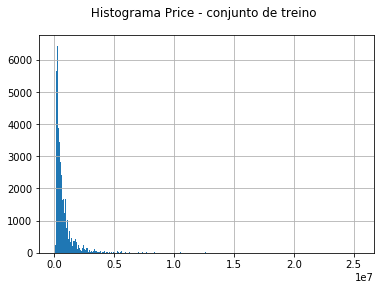

In [21]:
# Visualização dos preços: Histograma.
df_treino.price.hist(bins=500)
plt.suptitle(' Histograma Price - conjunto de treino')

## 2.4) usableAreas

* Variável numérica: a alta quantidade de valores únicos não é problema.
* Valores nulos: são muito raros (aprox. 0,0125%) serão substituídos pela mediana do conjunto de treino.
* Outliers: valores acima de (média + 2*desvio padrão) são outliers: todos eles serão reduzidos a tal valor.
    * **Esta prática impede que valores altos e raros enviezem o modelo.**
* Observa-se que a variável possui distribuição aproximadamente normal.
* Observa-se que o preço do imóvel tende a aumentar com o aumento de usableAreas: provavelmente será uma feature importante.
* Transformação "Standardize": impede que a escala da variável influencie o modelo.

In [22]:
# Verifica quantidade de valores missing.
df_treino.usableAreas.isna().value_counts()

False    64138
True         8
Name: usableAreas, dtype: int64

In [23]:
# Métricas estatísticas
desc = df_treino['usableAreas'].describe()
desc

count     64138.000000
mean        116.330101
std         631.949834
min           0.000000
25%          59.000000
50%          82.000000
75%         135.000000
max      129000.000000
Name: usableAreas, dtype: float64

In [24]:
# Mediana do conjunto de treino.
med = df_treino['usableAreas'].median()
med

82.0

In [25]:
# Substitui valores missing dos conjuntos de treino e de testes pela mediana do conjunto de treino.
df_treino['usableAreas'] = df_treino['usableAreas'].apply(lambda x: med if pd.isna(x) else x)
df_teste['usableAreas'] = df_teste['usableAreas'].apply(lambda x: med if pd.isna(x) else x)

In [26]:
# Outlier = média + 2*desvio padrão do conjunto de treino.
lim = desc[1] + 2*desc[2]
lim

1380.2297685619603

In [27]:
# Remoção de outliers dos conjuntos de treino e de testes usando outlier do conjunto de treino.
df_treino['usableAreas'] = df_treino['usableAreas'].apply(lambda x: lim if x > lim else x)
df_teste['usableAreas'] = df_teste['usableAreas'].apply(lambda x: lim if x > lim else x)

In [28]:
# Média e desvio padrão do conjunto de treino.
avg = df_treino['usableAreas'].mean()
std = df_treino['usableAreas'].std()
[avg, std]

[112.46181768501145, 87.54364065884856]

In [29]:
# Transformação "Standardize" dos conjuntos de treino e de testes usando média e desvio padrão do conjunto de treino.
df_treino['usableAreas'] = df_treino['usableAreas'].apply(lambda x: (x - avg)/std)
df_teste['usableAreas'] = df_teste['usableAreas'].apply(lambda x: (x - avg)/std)

Text(0.5,0.98,'Histograma usableAreas - conjunto de treino')

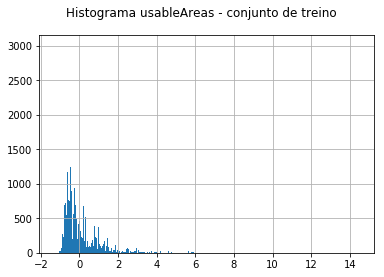

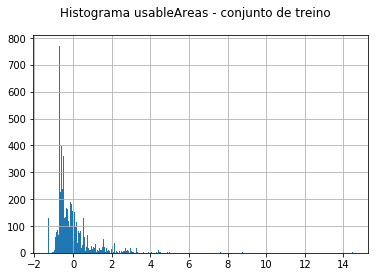

In [30]:
# Histogramas
df_treino['usableAreas'].hist(bins=1000)
plt.suptitle('Histograma usableAreas - conjunto de treino')
plt.figure()
df_teste['usableAreas'].hist(bins=1000)
plt.suptitle('Histograma usableAreas - conjunto de treino')

Text(0.5,0.98,'Scatter Plot price x usableAreas - conjunto de treino')

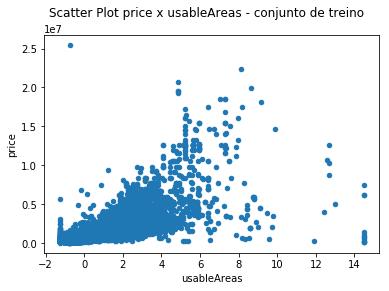

In [31]:
# SCATTER PLOT relacionado variável ao preço.
df_treino.plot.scatter(x='usableAreas', y='price')
plt.suptitle('Scatter Plot price x usableAreas - conjunto de treino')

## 2.5) title, createdAt, updatedAt

* Nenhuma destas variáveis parece ter muita informação que possa ser útil.
* Não serão usadas neste trabalho.

## 2.6) publisherId

* Existem 2851 publicadores únicos no conjunto de treino. É possível que haja publicadores no conjunto de testes que não estejam no conjunto de treino.
* Parece pouco provável que haja informações úteis nesta variável. Por exemplo, os principais publicadores parecem ser imobiliárias. Tais empresas trabalham com imóveis em diversas faixas de preço, então não se espera que sirvam como bom atributo ao modelo de previsão.
* Por fim, trata-se de uma **variável categórica e nominal** (ou seja, não há uma sequência implícita de valores) que é praticamente impossível de codificar, mesmo usando one hot encode.
* Não será usada neste trabalho.

In [32]:
# Verifica quantidade de valores missing.
df_treino['publisherId'].isna().value_counts()

False    64146
Name: publisherId, dtype: int64

In [33]:
# Verifica quantidade de valores únicos.
len(df_treino['publisherId'].unique())

2851

In [34]:
# Distribuição de Frequências da variável.
df_treino['publisherId'].value_counts()

a8b38b03a8    1595
d7190e8f4c    1299
4078ef08b4     978
19ddf2ccb1     940
0ec61496e4     858
df07b0b37e     812
bddebf057a     664
6da0a148b1     622
e8dc040d2d     596
e7529c4598     504
69ca10c568     456
20b0869949     439
ad38ca2156     405
c0de129662     385
7ba9a1a725     383
c1df40763f     378
af8444aba5     361
316d75f06f     361
b40756a11e     335
0d8a4eceb9     327
e78fd32343     318
e0fff23659     308
afbfad0d12     303
73f436c21a     293
57ea499156     290
047cca6ebd     290
f0fc49dfea     279
d2adb7f92a     272
523bc6c388     272
149e431603     271
              ... 
a4d0a99cc2       1
5d1405babb       1
92403c7d2b       1
92b759b178       1
9fa297db8b       1
b7874fa755       1
8166aebe0c       1
278f15e682       1
22e71c6b79       1
ef062c0210       1
45677aab19       1
904bdf46e5       1
d9619afdcc       1
4c1e7a5f15       1
0e69f923e2       1
2dc26533f8       1
293fe54748       1
fe51b1bebb       1
4f7da9a3b6       1
79ac558221       1
bf74b25a94       1
3edd9eb53f  

## 2.7) listingStatus

* Todos são ACTIVE.
* Não será usada neste trabalho.

In [35]:
# Verifica quantidade de valores missing.
df_treino['listingStatus'].isna().value_counts()

False    64146
Name: listingStatus, dtype: int64

In [36]:
# Distribuição de Frequências da variável (conj. treino).
df_treino.groupby('listingStatus').size()

listingStatus
ACTIVE    64146
dtype: int64

In [37]:
# Distribuição de Frequências da variável (conj. teste).
df_teste.groupby('listingStatus').size()

listingStatus
ACTIVE    16036
dtype: int64

## 2.8) parkingSpaces

* Variável numérica.
* Valores nulos: (aprox. 1,76%) serão substituídos pela mediana do conjunto de treino.
* Outliers: valores acima de média + 3*desvio padrão são outliers: todos eles serão reduzidos a tal valor.
    * **Esta prática impede que valores altos e raros enviezem o modelo.**
* Observa-se que a variável possui distribuição aproximadamente normal.
* Observa-se que o preço do imóvel tende a aumentar com o aumento de parkingSpaces, mas de forma apenas moderada.
* Transformação "Normalize".

In [38]:
# Verifica quantidade de valores missing.
df_treino['parkingSpaces'].isna().value_counts()

False    63018
True      1128
Name: parkingSpaces, dtype: int64

In [39]:
# Distribuição de Frequências da variável.
df_treino.groupby('parkingSpaces').size()

parkingSpaces
0.0       3256
1.0      29724
2.0      17992
3.0       6576
4.0       3800
5.0       1088
6.0        399
7.0        102
8.0         39
9.0         10
10.0         8
11.0         5
12.0         9
13.0         2
14.0         2
19.0         1
30.0         1
32.0         1
70.0         1
99.0         1
215.0        1
dtype: int64

In [40]:
# Mediana do conjunto de treino.
med = df_treino['parkingSpaces'].median()
med

1.0

In [41]:
# Substitui valores missing dos conjuntos de treino e de testes pela mediana do conjunto de treino.
df_treino['parkingSpaces'] = df_treino['parkingSpaces'].apply(lambda x: med if pd.isna(x) else x)
df_teste['parkingSpaces'] = df_teste['parkingSpaces'].apply(lambda x: med if pd.isna(x) else x)

In [42]:
# Estatísticas da variável.
df_treino.parkingSpaces.describe()

count    64146.000000
mean         1.737848
std          1.506530
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        215.000000
Name: parkingSpaces, dtype: float64

In [43]:
# Outlier: media + 3*desvio padrão = 6,29 => usar outlier = 7
lim = 7

In [44]:
# Remoção de outliers dos conjuntos de treino e de testes usando outlier do conjunto de treino.
df_treino['parkingSpaces'] = df_treino['parkingSpaces'].apply(lambda x: lim if x > lim else x)
df_teste['parkingSpaces'] = df_teste['parkingSpaces'].apply(lambda x: lim if x > lim else x)

In [45]:
# Valores mínimo e máximo do conjunto de treino.
mini = df_treino['parkingSpaces'].min()
maxi = df_treino['parkingSpaces'].max()
[mini, maxi]

[0.0, 7.0]

In [46]:
# Transformação "Normalize" dos conjuntos de treino e de testes usando mínimo e máximo do conjunto de treino.
df_treino['parkingSpaces'] = df_treino['parkingSpaces'].apply(lambda x: (x - mini)/(maxi - mini))
df_teste['parkingSpaces'] = df_teste['parkingSpaces'].apply(lambda x: (x - mini)/(maxi - mini))

Text(0.5,0.98,'Histograma parkingSpaces - conjunto de treino')

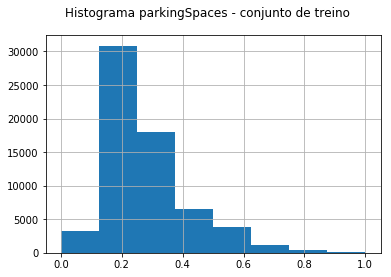

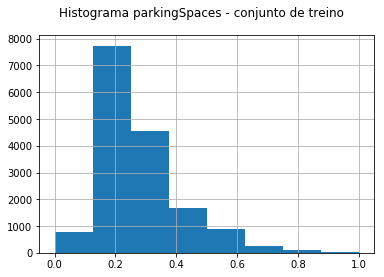

In [47]:
# Histogramas
df_treino['parkingSpaces'].hist(bins=lim+1)
plt.suptitle('Histograma parkingSpaces - conjunto de treino')
plt.figure()
df_teste['parkingSpaces'].hist(bins=lim+1)
plt.suptitle('Histograma parkingSpaces - conjunto de treino')

Text(0.5,0.98,'Scatter Plot price x parkingSpaces - conjunto de treino')

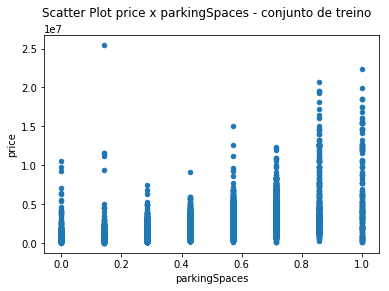

In [48]:
# SCATTER PLOT relacionado variável ao preço.
df_treino.plot.scatter(x='parkingSpaces', y='price')
plt.suptitle('Scatter Plot price x parkingSpaces - conjunto de treino')

## 2.9) owner

* Os valores True são extremamente raros (< 0,1%) e dificilmente possuem algum efeito significativo.
* Variável não será usada.

In [49]:
# Verifica quantidade de valores missing.
df_treino['owner'].isna().value_counts()

False    64146
Name: owner, dtype: int64

In [50]:
# Distribuição de frequências - conj. treino.
df_treino.groupby('owner').size()

owner
False    64129
True        17
dtype: int64

In [51]:
# Distribuição de frequências - conj. teste.
df_teste.groupby('owner').size()

owner
False    16033
True         3
dtype: int64

## 2.10) country, city

* Todos os anúncios são do Brasil.
* Todos os anúncios são da cidade de SP.
* Variáveis não serão usadas.

In [52]:
# Verifica quantidade de valores missing.
df_treino['country'].isna().value_counts()

True     58242
False     5904
Name: country, dtype: int64

In [53]:
# Distribuição de frequências - conj. treino.
df_treino.groupby('country').size()

country
BR    5904
dtype: int64

In [54]:
# Distribuição de frequências - conj. teste.
df_teste.groupby('country').size()

country
BR    1533
dtype: int64

In [55]:
# Verifica quantidade de valores missing.
df_treino['city'].isna().value_counts()

False    64146
Name: city, dtype: int64

In [56]:
# Distribuição de frequências - conj. treino.
df_treino.groupby('city').size()

city
São Paulo    64146
dtype: int64

In [57]:
# Distribuição de frequências - conj. teste.
df_teste.groupby('city').size()

city
São Paulo    16036
dtype: int64

## 2.11) zipCode

* Quantidade razoável de valores missing (aprox. 4%)
* Há 6831 zipCodes distintos no conjunto de treino. A grande maioria dos valores aparece 1 ou 2 vezes.
* Provavelmente há zipCodes no conjunto de teste que não estão no de treino.
* Há muitos valores que parecem estar errados (como 00000000, que ocorre 917 vezes), mas é difícil saber quais são os demais valores errados.
* Longitude e latitude dão informações bem parecidas.
* Não será usada.

In [58]:
# Verifica quantidade de valores missing.
df_treino['zipCode'].isna().value_counts()

False    61590
True      2556
Name: zipCode, dtype: int64

In [59]:
# Distribuição de frequências - conj. treino.
df_treino.groupby('zipCode').size()

zipCode
00000000    917
00004269      1
00123101      1
00311800      1
00335050      3
00336010     10
00426001      7
00429500      2
00452090      1
00456900      2
00458000      4
00541100      1
01000000      1
01000001      3
01005020      2
01006020      1
01006030      1
01011100      1
01012010      2
01014010      1
01015060      2
01015070      1
01015080      1
01017000      5
01017010      2
01017904      1
01017905      1
01020000     10
01020001      5
01020002      2
           ... 
24350000      2
30200000      3
31740000      3
31880000      6
33200000      6
33219000      2
33250000      4
33430000      5
34140100      2
34770000      1
37330000      3
40030028      2
40464000      1
40779030      2
40810000      1
41080000      4
41272432      6
43020210      2
53500000      2
53729020      1
56880000      1
57344150      1
57670000      1
59052700      2
64550000      6
67300000      1
69940000      2
85926800      1
96316836      1
99810303      2
Length: 6831, dt

## 2.12) streetNumber

* Há 2369 streetNumbers distintos no conjunto de treino. Boa parte dos valores aparece 1 ou 2 vezes.
* Provavelmente há streetNumbers no conjunto de teste que não aestão no de treino.
* Há muitos valores que parecem estar errados (como 0: ocorre 113 vezes, e 1: ocorre 630 vezes), difícil saber quais são todos eles.
* Aproximadamente 1/3 de valores missing.
* De qualquer forma, não parece haver correlação entre streetNumber e price. Até porque, streetNumbers pequenos são muito mais comuns do que numbers grandes (toda rua tem números pequenos, mas poucas possuem números grandes).
* Esa variável não será usada.

In [60]:
# Verifica quantidade de valores missing.
df_treino['streetNumber'].isna().value_counts()

False    43098
True     21048
Name: streetNumber, dtype: int64

In [61]:
df_treino.groupby('streetNumber').size()

streetNumber
0             51
0-400          1
00            42
000           14
0000           2
00000          1
000008777      1
0009999        1
001            1
004            1
01            33
02             3
020            1
027            1
04             1
05             1
06             1
060            1
07             1
08             6
086            1
09             4
1            596
10           164
100          465
1000          73
1001          39
1002           2
1003          10
1005          22
            ... 
974            9
975           21
976           10
977           20
978            3
979            5
98            43
980           22
981           13
982           12
983            6
984           12
985            4
9851           1
986            5
987            4
988            8
989           16
99            93
990            6
991            3
992            6
993            7
995            2
996            5
998            4
999           16
A

## 2.13) zone  

* Quantidade muito alta de valores missing (aprox. 90%).
* Não será usada, pois tal informação também é dada pela variável _locationID_, que quase não possui missings.

In [62]:
# Verifica quantidade de valores missing.
df_treino['zone'].isna().value_counts()

True     56488
False     7658
Name: zone, dtype: int64

In [63]:
# Distribuição de Frequências.
df_treino.groupby('zone').size()

zone
Centro        1564
Zona Leste    1185
Zona Norte    1336
Zona Oeste    1039
Zona Sul      2534
dtype: int64

## 2.14) precision

* Se refere ao método de geo localização.
* Não parece possuir informação relevante.
* Não será usada no modelo.

In [64]:
# Verifica quantidade de valores missing.
df_treino['precision'].isna().value_counts()

False    64141
True         5
Name: precision, dtype: int64

In [65]:
df_treino.groupby('precision').size()

precision
APPROXIMATE            2945
GEOMETRIC_CENTER      18477
NO_GEOCODE               16
RANGE_INTERPOLATED     6043
ROOFTOP               36660
dtype: int64

In [66]:
df_teste.groupby('precision').size()

precision
APPROXIMATE            726
GEOMETRIC_CENTER      4653
NO_GEOCODE               4
RANGE_INTERPOLATED    1542
ROOFTOP               9108
dtype: int64

## 2.15) lon, lat       

* Valores missing: (< 0,001%) substituir pelas medianas dos conjuntos de treino.
* Um histograma 2D mostra a localização dos imóveis, usando o preço para determinar a intensidade das cores. Conclui-se que há boa correlação entre coordenadas e preço.
* Transformação "Standardize" para diminuir efeito da escala da variável sobre o modelo.

In [67]:
# Verifica quantidade de valores missing.
df_treino['lon'].isna().value_counts()

False    64141
True         5
Name: lon, dtype: int64

In [68]:
# Verifica quantidade de valores missing.
df_treino['lat'].isna().value_counts()

False    64141
True         5
Name: lat, dtype: int64

In [69]:
# Substitui valores missing de 'lon' dos conj. de treino e de testes pela median_absolute_errorana do conj. de treino.
med = df_treino['lon'].median()
df_treino['lon'] = df_treino['lon'].apply(lambda x: med if pd.isna(x) else x)
df_teste['lon'] = df_teste['lon'].apply(lambda x: med if pd.isna(x) else x)

# Substitui valores missing de 'lat' dos conj. de treino e de testes pela median_absolute_errorana do conj. de treino.
med = df_treino['lat'].median()
df_treino['lat'] = df_treino['lat'].apply(lambda x: med if pd.isna(x) else x)
df_teste['lat'] = df_teste['lat'].apply(lambda x: med if pd.isna(x) else x)

Text(0.5,0.98,'Histograma 2D: Preço x latitude e longitude')

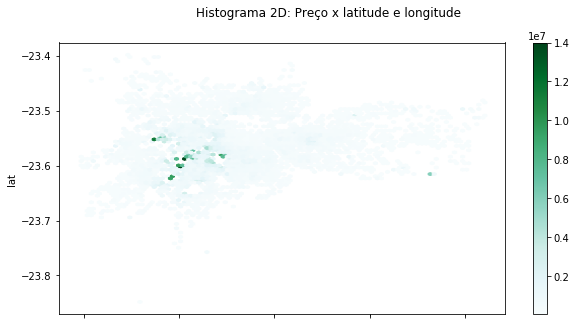

In [70]:
# Histograma 2D (hexbin)
df_treino.plot.hexbin(x='lon',y='lat', C='price', figsize=(10,5))
plt.suptitle('Histograma 2D: Preço x latitude e longitude')

In [71]:
# Transformação "Standardize" dos conjuntos de treino e de testes usando média e desvio padrão do conjunto de treino.
# lon
avg = df_treino['lon'].mean()
std = df_treino['lon'].std()
df_treino['lon'] = df_treino['lon'].apply(lambda x: (x - avg)/std)
df_teste['lon'] = df_teste['lon'].apply(lambda x: (x - avg)/std)

# lat
avg = df_treino['lat'].mean()
std = df_treino['lat'].std()
df_treino['lat'] = df_treino['lat'].apply(lambda x: (x - avg)/std)
df_teste['lat'] = df_teste['lat'].apply(lambda x: (x - avg)/std)

Text(0.5,0.98,'Histograma longitude - conj. treino')

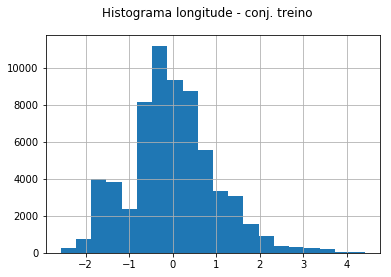

In [72]:
# Histograma.
df_treino['lon'].hist(bins=20)
plt.suptitle('Histograma longitude - conj. treino')

Text(0.5,0.98,'Histograma latitude - conj. treino')

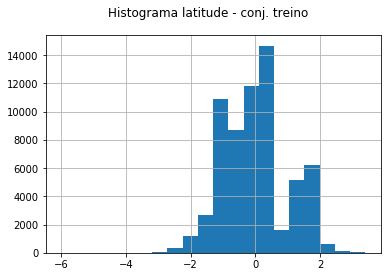

In [73]:
df_treino['lat'].hist(bins=20)
plt.suptitle('Histograma latitude - conj. treino')

## 2.16) street             

* Há 4591 streets distintas no conjunto de treino. Boa parte dos valores aparece 1 ou 2 vezes.
* Provavelmente há streets no conjunto de teste que não estão no de treino.
* Quantidade razoável de missings (aprox. 4,5%)
* O zipcode, o bairro e as coordenadas geográficas dão informações bem parecidas.
* Não será usada.

In [74]:
# Verifica quantidade de valores missing.
df_treino['street'].isna().value_counts()

False    61247
True      2899
Name: street, dtype: int64

In [75]:
df_treino.groupby('street').size()

street
9 de Julho                                         2
Alameda Afonso Schmidt                            47
Alameda Agenor Couto Magalhães                     1
Alameda Barros                                    28
Alameda Barão de Limeira                          12
Alameda Barão de Piracicaba                        1
Alameda Campinas                                  97
Alameda Casa Branca                               75
Alameda Eduardo Prado                              2
Alameda Fernão Cardim                            103
Alameda Franca                                   197
Alameda Gabriel Monteiro da Silva                 11
Alameda Glete                                      9
Alameda Iraé                                      11
Alameda Itu                                      151
Alameda Itupiranga                                 1
Alameda Jauaperi                                  53
Alameda Jaú                                      145
Alameda Joaquim Eugênio de Lima        

## 2.17) locationId 

* Não contém valores missing.
* Formato dos dados: País > Estado > ? > Cidade > Zona > Bairro.
* Será usada para determinar a zona da cidade, já que a variável zone contém 90% de missings.
    * Algumas instâncias não possuem zone, ou possuem zone 'Barrios'. Serão substituídas pela classe modal.
    * Variável nova: locationId_zone.
    * Será codificada usando one hot encode: neste caso, serão usadas as variáveis **locationId_zone_zl, locationId_zone_zn, locationId_zone_zo, locationId_zone_zs**. Os imóveis no centro são aqueles que possuem 0 nas quatro variáveis.
* Também pode ser usada para determinar o bairro em refinamentos futuros.

In [76]:
# Verifica quantidade de valores missing.
df_treino['locationId'].isna().value_counts()

False    64146
Name: locationId, dtype: int64

In [77]:
# Típico valor desta variável.
# Formato dos dados: País > Estado > ? > Cidade > Zona > Bairro
df_treino['locationId'][0]

'BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Vila Olimpia'

In [78]:
# Usa a função split para quebrar as strings toda vez que encontra o sinal '>'.
# A zona é o 5º valor da lista gerada.
# Caso a lista não possua um quinto valor (por ser curta, erro de preeenchimento), retorna valor 'unk'.
df_treino['locationId_zone'] = df_treino['locationId'].apply(lambda x: x.split('>')[4] if len(x.split('>')) > 4 else 'unk')
df_teste['locationId_zone'] = df_teste['locationId'].apply(lambda x: x.split('>')[4] if len(x.split('>')) > 4 else 'unk')

In [79]:
# Distribuição de frequências.
df_treino.groupby('locationId_zone').size()

locationId_zone
Barrios          10
Centro         6621
Zona Leste    11457
Zona Norte    11401
Zona Oeste     9475
Zona Sul      25148
unk              34
dtype: int64

In [80]:
# Determina a moda do conj. de treino.
mod = df_treino.groupby('locationId_zone').size().idxmax()
mod

'Zona Sul'

In [81]:
# Substitui valores ausentes e 'Barrios' de ambos os conjuntos pela moda do conj. de treino.
df_treino['locationId_zone'] = df_treino['locationId_zone'].apply(lambda x: mod if x == 'Barrios' or x == 'unk' else x)
df_teste['locationId_zone'] = df_teste['locationId_zone'].apply(lambda x: mod if x == 'Barrios' or x == 'unk' else x)

In [82]:
# Nova distribuição de frequências do conj. de treino.
df_treino.groupby('locationId_zone').size()

locationId_zone
Centro         6621
Zona Leste    11457
Zona Norte    11401
Zona Oeste     9475
Zona Sul      25192
dtype: int64

In [83]:
# Nova distribuição de frequências do conj. de teste.
df_teste.groupby('locationId_zone').size()

locationId_zone
Centro        1665
Zona Leste    2882
Zona Norte    2838
Zona Oeste    2317
Zona Sul      6334
dtype: int64

In [84]:
# One hot encode p/ conj. treino.
df_treino['locationId_zone_ZL'] = df_treino['locationId_zone'].apply(lambda x: 1 if x == 'Zona Leste' else 0)
df_treino['locationId_zone_ZN'] = df_treino['locationId_zone'].apply(lambda x: 1 if x == 'Zona Norte' else 0)
df_treino['locationId_zone_ZO'] = df_treino['locationId_zone'].apply(lambda x: 1 if x == 'Zona Oeste' else 0)
df_treino['locationId_zone_ZS'] = df_treino['locationId_zone'].apply(lambda x: 1 if x == 'Zona Sul' else 0)

# One hot encode p/ conj. teste.
df_teste['locationId_zone_ZL'] = df_teste['locationId_zone'].apply(lambda x: 1 if x == 'Zona Leste' else 0)
df_teste['locationId_zone_ZN'] = df_teste['locationId_zone'].apply(lambda x: 1 if x == 'Zona Norte' else 0)
df_teste['locationId_zone_ZO'] = df_teste['locationId_zone'].apply(lambda x: 1 if x == 'Zona Oeste' else 0)
df_teste['locationId_zone_ZS'] = df_teste['locationId_zone'].apply(lambda x: 1 if x == 'Zona Sul' else 0)

In [85]:
# Exemplo da codificação dos dados.
df_treino[['locationId', 'locationId_zone_ZL', 'locationId_zone_ZN', 'locationId_zone_ZO', 'locationId_zone_ZS']].head(10)

,locationId,locationId_zone_ZL,locationId_zone_ZN,locationId_zone_ZO,locationId_zone_ZS
id,,,,,
6654d93423,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Vila Olimpia,0,0,0,1
9ffaf676ae,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Paraiso,0,0,0,1
f03e22422a,BR>Sao Paulo>NULL>Sao Paulo>Zona Oeste>Pinheiros,0,0,1,0
8e1922c386,BR>Sao Paulo>NULL>Sao Paulo>Centro>Aclimacao,0,0,0,0
690407f653,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Morumbi,0,0,0,1
7be005debd,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Sacoma,0,0,0,1
7623d6d4d0,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Sacoma,0,0,0,1
3d756cfa06,BR>Sao Paulo>NULL>Sao Paulo>Zona Sul>Bosque da...,0,0,0,1
7a7f945bf9,BR>Sao Paulo>NULL>Sao Paulo>Zona Oeste>Vila Gomes,0,0,1,0


## 2.18) district, unitNumber  

* A variável __district__ contém valores para apenas 3 das 64146 entradas do conjunto de treinos, e é missing em todas as entradas do conjunto de teste.
* A variável __unitNumber__ contém valores para apenas 23 das 64146 entradas do conjunto de treinos, e para apenas 7 das 16036 entradas do conjunto de teste. Além disso, boa parte dos valores estão errados, como se nota na Distribuição de frequencias.
* Nenhuma das duas será uasada no modelo.

In [86]:
# Verifica quantidade de valores missing.
df_treino['district'].isna().value_counts()

True     64143
False        3
Name: district, dtype: int64

In [87]:
# Verifica quantidade de valores missing.
df_teste['district'].isna().value_counts()

True    16036
Name: district, dtype: int64

unitNumber

In [88]:
# Verifica quantidade de valores missing.
df_treino['unitNumber'].isna().value_counts()

True     64123
False       23
Name: unitNumber, dtype: int64

In [89]:
# Verifica quantidade de valores missing.
df_teste['unitNumber'].isna().value_counts()

True     16029
False        7
Name: unitNumber, dtype: int64

In [90]:
# Distribuição de frequências - conj. treino.
df_treino.groupby('unitNumber').size()

unitNumber
02                                    1
1140                                  1
21                                    1
41                                    1
451                                   1
APTO                                  1
APTO 81                               1
Apartamento                           4
Campos Eliseos                        1
Condomínio                            1
Contracta- Fone Ricardo: 5509-7740    1
Dona Norma                            1
Edifício Bluemont                     1
Edifício Itaici                       1
PRÓXIMO AO METRÔ CAMPO LIMPO          1
Quatro Estações                       1
Tribeca Nova Leopoldina               1
Vila Nova Leopoldina                  1
Ville Bayard                          1
Well Pompéia                          1
dtype: int64

In [91]:
# Distribuição de frequências - conj. teste.
df_teste.groupby('unitNumber').size()

unitNumber
42                   1
505                  1
81                   1
Apartamento          1
Bloco A              1
Pronto para morar    1
Residencial          1
dtype: int64

## 2.19) state 

* Há apenas 1 missing.
* Todos os imóveis são do estado de São Paulo, já que todos eles estão no município de São Paulo.
* Há um imóvel marcado em Santa Catarina, mas parece ser um erro, já que sua _locationId_ aponta para um bairro da zona Norte paulista.
* De qualquer forma, a variável não será usada.

In [92]:
# Verifica quantidade de valores missing.
df_treino['state'].isna().value_counts()

False    64145
True         1
Name: state, dtype: int64

In [93]:
# Distribuição de frequências.
df_treino.groupby('state').size()

state
SP                  202
Santa Catarina        1
São Paulo         63942
dtype: int64

In [94]:
# locationId da instância de Santa Catarina.
# O imóvel é da ZN paulista.
df_treino[df_treino['state'] == 'Santa Catarina']['locationId'][0]

'BR>Sao Paulo>NULL>Sao Paulo>Zona Norte>Lauzane Paulista'

In [95]:
# Valores únicos do conj. de teste.
# Todos imóveis do estado de SP.
df_teste['state'].unique()

array(['São Paulo', 'SP'], dtype=object)

## 2.20) neighborhood

* Há 10 valores missing.
* Há 1130 bairros distintos no conjunto de treino. Boa parte dos valores aparece 1 ou 2 vezes. 
    * Presume-se que há bairros repetidos (variações na escrita, erros de digitação).
* Provavelmente há bairros no conjunto de teste que não estão no de treino.
* **As coordenadas geográficas dão informações bem parecidas e mais precisas.**
* Não será usada no modelo.

In [96]:
# Verifica quantidade de valores missing.
df_treino['neighborhood'].isna().value_counts()

False    64136
True        10
Name: neighborhood, dtype: int64

In [97]:
# Distribuição de frequências.
df_treino.groupby('neighborhood').size()

neighborhood
176                             3
204                             4
A. Pinheiros                    4
Aclimação                     391
Aeroporto                       2
Alto Klabin                    10
Alto Mandaqui                   1
Alto da Boa Vista              13
Alto da Lapa                  176
Alto da Mooca                 285
Alto de Pinheiros             240
Alto do Pari                    7
Altos de Vila Prudente          2
Aricanduva                      9
Artur Alvim                    35
BROOKLIN                        2
Balneário São Francisco         1
Barra Funda                   126
Barro Branco                    5
Barro Branco (Zona Norte)      67
Bela Aliança                    5
Bela Vista                   1196
Belenzinho                    196
Belém                          53
Boaçava                        35
Bom Retiro                     22
Bosque da Saúde               221
Brasilândia                    39
Brooklin                      181
B

## 2.21) suites

* Há uma quantidade relativamente alta de missings no conjunto de treino (aprox. 8,5%).
* Todos os valores missing dos conjuntos de treino e de teste serão substituídos pela mediana do conjunto de treino.
* Valores acima de 5 são considerados outliers/muito raros e serão reduzidos para 5.
    * Valores acima de 5 possuem uma frequência muito menor do que as demais categorias e podem enviezar o modelo.
* Transformação "Normalize": tenta atenuar o efeito da escala sobre o modelo.
* Gráfico mostra uma correlação fraca entre suites e preço: há uma leve tendência a ocorrerem preços maiores em imóveis com mais suites.

In [98]:
# Verifica quantidade de valores missing.
df_treino['suites'].isna().value_counts()

False    58510
True      5636
Name: suites, dtype: int64

In [99]:
# Distribuição de Frequências.
df_treino.groupby('suites').size()

suites
0.0     17212
1.0     26697
2.0      4970
3.0      6746
4.0      2768
5.0       104
6.0         7
7.0         1
8.0         1
10.0        2
13.0        1
23.0        1
dtype: int64

In [100]:
# Mediana da variável do conj. de treino.
med = df_treino['suites'].median()
med

1.0

In [101]:
# Substitui valores missing de ambos os conjuntos pela mediana do conj. de treino.
df_treino['suites'] = df_treino['suites'].apply(lambda x: med if pd.isna(x) else x)
df_teste['suites'] = df_teste['suites'].apply(lambda x: med if pd.isna(x) else x)

In [102]:
# Outlier. Valores acima de 4 são muito raros/muito altos e podem enviezar o modelo.
lim = 5

In [103]:
# Substitui outliers de ambos os conjuntos pelo valor 5.
df_treino['suites'] = df_treino['suites'].apply(lambda x: lim if x > lim else x)
df_teste['suites'] = df_teste['suites'].apply(lambda x: lim if x > lim else x)

In [104]:
# Nova distribuição de frequências.
df_treino.groupby('suites').size()

suites
0.0    17212
1.0    32333
2.0     4970
3.0     6746
4.0     2768
5.0      117
dtype: int64

In [105]:
# Valores mínimos e máximos do conj. de treino.
mini = df_treino['suites'].min()
maxi = df_treino['suites'].max()
[mini, maxi]

[0.0, 5.0]

In [106]:
# Transformação "Normalize" dos conjuntos de treino e de testes usando mínimo e máximo do conjunto de treino.
df_treino['suites'] = df_treino['suites'].apply(lambda x: (x - mini)/(maxi - mini))
df_teste['suites'] = df_teste['suites'].apply(lambda x: (x - mini)/(maxi - mini))

Text(0.5,0.98,'Histograma suites - conj. teste')

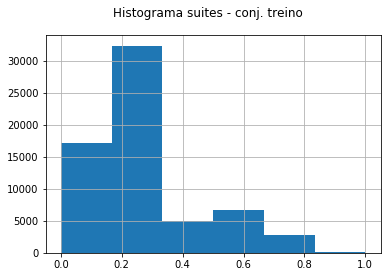

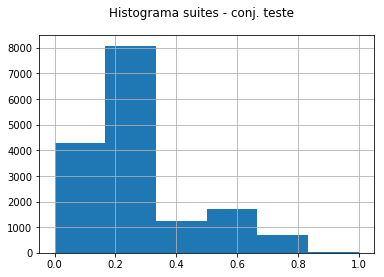

In [107]:
# Histogramas.
df_treino['suites'].hist(bins=lim+1)
plt.suptitle('Histograma suites - conj. treino')
plt.figure()
df_teste['suites'].hist(bins=lim+1)
plt.suptitle('Histograma suites - conj. teste')

Text(0.5,0.98,'Scatter Plot price x suites - conjunto de treino')

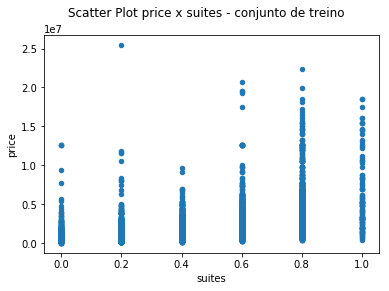

In [108]:
# SCATTER PLOT relacionado variável ao preço.
df_treino.plot.scatter(x='suites', y='price')
plt.suptitle('Scatter Plot price x suites - conjunto de treino')

## 2.22) publicationType

* O valor Premium é muito raro (aprox. 1,67% em ambos os conjuntos de dados).
* Não contém valores missing.
* Precisa ser convertida em binário:
    * 0: Standard
    * 1: Premium
* Será usada na esperança de fornecer alguma informação relevante, apesar de de ser muito desbalanceada (premium é muito raro em relação ao standard - ver histogramas).
    * Aarentemente, publicações premium se referem a imóveis mais baratos, como pode ser visto no gráfico, mas tal diferença pode não ser significativa no modelo.

In [109]:
# Verifica quantidade de valores missing.
df_treino['publicationType'].isna().value_counts()

False    64146
Name: publicationType, dtype: int64

In [110]:
# Distribuição de frequências - conj. treino.
df_treino['publicationType'].value_counts()

STANDARD    63127
PREMIUM      1019
Name: publicationType, dtype: int64

In [111]:
# Distribuição de frequências - conj. teste.
df_teste['publicationType'].value_counts()

STANDARD    15767
PREMIUM       269
Name: publicationType, dtype: int64

In [112]:
# Conversão em binário: Standard = 0 e Premium = 1.
df_treino['publicationType'] = df_treino['publicationType'].apply(lambda x: 1 if x == 'PREMIUM' else 0)
df_teste['publicationType'] = df_teste['publicationType'].apply(lambda x: 1 if x == 'PREMIUM' else 0)

Text(0.5,0.98,'Histograma publicationType - conj. teste')

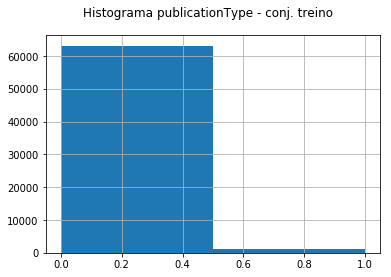

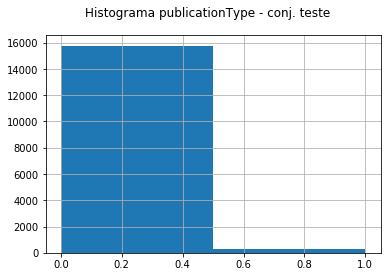

In [113]:
# Histogramas.
df_treino['publicationType'].hist(bins=2)
plt.suptitle('Histograma publicationType - conj. treino')
plt.figure()
df_teste['publicationType'].hist(bins=2)
plt.suptitle('Histograma publicationType - conj. teste')

Text(0.5,0.98,'Scatter Plot price x publicationType - conjunto de treino')

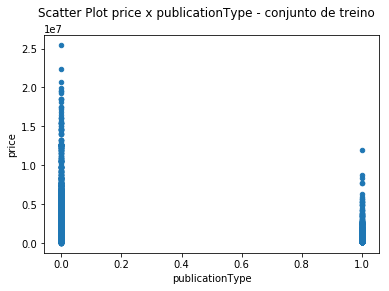

In [114]:
# SCATTER PLOT relacionado variável ao preço.
df_treino.plot.scatter(x='publicationType', y='price')
plt.suptitle('Scatter Plot price x publicationType - conjunto de treino')

## 2.23) bathrooms

* Possui apenas 1 valor missing: será substituído pela mediana.
* Valores acima de 7 são considerados outliers/muito raros e serão reduzidos para 7.
    * Valores a partir de 7 possuem uma frequência muito menor do que as demais categorias e podem enviezar o modelo.
* Transformação "Normalize": tenta atenuar o efeito da escala sobre o modelo.
* É bastante estranho haver apartamentos com 0 banheiros.
    * Uma investigação mais profunda deve ser realizada para descobrir os motivos.
    * Talvez tais apartamentos devam ser trocados para a classe com 1 banheiro.
* Gráfico mostra uma correlação muito fraca entre bathrooms e preço: há uma ligeira tendência a ocorrerem preços maiores em imóveis com mais banheiros.
    * **Dificilmente será útil ao modelo de previsão.**

In [115]:
# Verifica quantidade de valores missing.
df_treino['bathrooms'].isna().value_counts()

False    64145
True         1
Name: bathrooms, dtype: int64

In [116]:
# Distribuição de frequências.
df_treino.groupby('bathrooms').size()

bathrooms
0.0      2053
1.0     21985
2.0     18601
3.0      9308
4.0      5803
5.0      4512
6.0      1609
7.0       195
8.0        48
9.0        13
10.0        1
11.0        1
12.0        5
13.0        1
14.0        1
15.0        1
22.0        1
33.0        1
53.0        2
99.0        4
dtype: int64

In [117]:
# Mediana da variável do conj. de treino.
med = df_treino['bathrooms'].median()
med

2.0

In [118]:
# Substitui valores missing de ambos os conjuntos pela mediana do conj. de treino.
df_treino['bathrooms'] = df_treino['bathrooms'].apply(lambda x: med if pd.isna(x) else x)
df_teste['bathrooms'] = df_teste['bathrooms'].apply(lambda x: med if pd.isna(x) else x)

In [119]:
# Outlier: valores a partir de 7 são muito raros/altos e podem enviezar o modelo.
lim = 7

In [120]:
# Substitui outliers de ambos os conjuntos pelo valor 5.
df_treino['bathrooms'] = df_treino['bathrooms'].apply(lambda x: lim if x > lim else x)
df_teste['bathrooms'] = df_teste['bathrooms'].apply(lambda x: lim if x > lim else x)

In [121]:
# Nova distribuição de frequências.
df_treino.groupby('bathrooms').size()

bathrooms
0.0     2053
1.0    21985
2.0    18602
3.0     9308
4.0     5803
5.0     4512
6.0     1609
7.0      274
dtype: int64

In [122]:
# Valores mínimo e máximo da variável.
mini = df_treino['bathrooms'].min()
maxi = df_treino['bathrooms'].max()
[mini, maxi]

[0.0, 7.0]

In [123]:
# Transformação "Normalize" dos conjuntos de treino e de testes usando mínimo e máximo do conjunto de treino.
df_treino['bathrooms'] = df_treino['bathrooms'].apply(lambda x: (x - mini)/(maxi - mini))
df_teste['bathrooms'] = df_teste['bathrooms'].apply(lambda x: (x - mini)/(maxi - mini))

Text(0.5,0.98,'Histograma bathrooms - conj. treino')

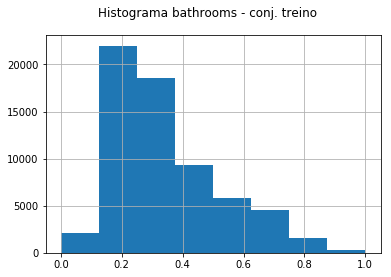

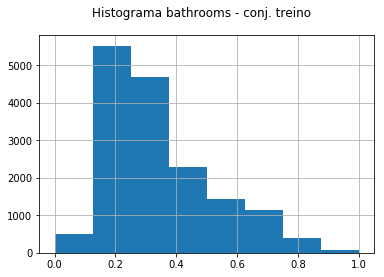

In [124]:
# Histogramas.
df_treino['bathrooms'].hist(bins=lim+1)
plt.suptitle('Histograma bathrooms - conj. treino')
plt.figure()
df_teste['bathrooms'].hist(bins=lim+1)
plt.suptitle('Histograma bathrooms - conj. treino')

Text(0.5,0.98,'Scatter Plot price x bathrooms - conjunto de treino')

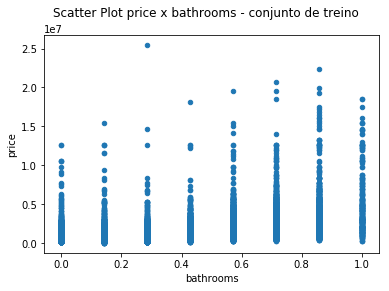

In [125]:
# SCATTER PLOT relacionado variável ao preço.
df_treino.plot.scatter(x='bathrooms', y='price')
plt.suptitle('Scatter Plot price x bathrooms - conjunto de treino')

## 2.24) totalAreas

* Aproximadamente 40% dos valores é missing.
* Indica informação muito similar àquela da variável usablearea.
* Não será usada.

In [126]:
# Verifica quantidade de valores missing.
df_treino['totalAreas'].isna().value_counts()

False    39190
True     24956
Name: totalAreas, dtype: int64

## 2.25) bedrooms

* Não possui valores missing.
* Valores acima de 5 são considerados outliers/muito raros e serão reduzidos para 5.
    * Valores a partir de 5 possuem uma frequência muito menor do que as demais categorias e podem enviezar o modelo.
* Transformação "Normalize": tenta atenuar o efeito da escala sobre o modelo.
* É bastante estranho haver apartamentos com 0 quartos: valor típico de kitnets, não de apartamentos.
    * Uma investigação mais profunda deve ser realizada para descobrir os motivos.
    * Talvez tais apartamentos devam ser trocados para a classe com 1 quarto.
* Gráfico mostra uma correlação fraca entre bedrooms e preço: há uma leve tendência a ocorrerem preços maiores em imóveis com mais quartos (a tendência se inverte para quantidades maiores de quartos).

In [127]:
# Verifica quantidade de valores missing.
df_treino['bedrooms'].isna().value_counts()

False    64146
Name: bedrooms, dtype: int64

In [128]:
# Distribuição de frequências.
df_treino.groupby('bathrooms').size()

bathrooms
0.000000     2053
0.142857    21985
0.285714    18602
0.428571     9308
0.571429     5803
0.714286     4512
0.857143     1609
1.000000      274
dtype: int64

In [129]:
# Outlier: valores a partir de 5 são muito raros/altos e podem enviezar o modelo.
lim = 5

In [130]:
# Substitui outliers de ambos os conjuntos pelo valor 5.
df_treino['bedrooms'] = df_treino['bedrooms'].apply(lambda x: lim if x > lim else x)
df_teste['bedrooms'] = df_teste['bedrooms'].apply(lambda x: lim if x > lim else x)

In [131]:
# Nova distribuição de frequências.
df_treino.groupby('bedrooms').size()

bedrooms
0.0      116
1.0     5471
2.0    24142
3.0    26519
4.0     7609
5.0      289
dtype: int64

In [132]:
# Valores mínimo e máximo da variável.
mini = df_treino['bedrooms'].min()
maxi = df_treino['bedrooms'].max()
[mini, maxi]

[0.0, 5.0]

In [133]:
# Transformação "Normalize" dos conjuntos de treino e de testes usando mínimo e máximo do conjunto de treino.
df_treino['bedrooms'] = df_treino['bedrooms'].apply(lambda x: (x - mini)/(maxi - mini))
df_teste['bedrooms'] = df_teste['bedrooms'].apply(lambda x: (x - mini)/(maxi - mini))

Text(0.5,0.98,'Histograma bedrooms - conj. treino')

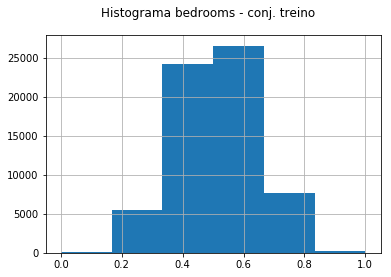

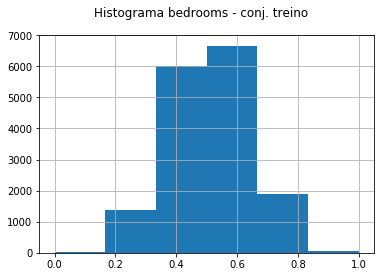

In [134]:
# Histogramas.
df_treino['bedrooms'].hist(bins=lim+1)
plt.suptitle('Histograma bedrooms - conj. treino')
plt.figure()
df_teste['bedrooms'].hist(bins=lim+1)
plt.suptitle('Histograma bedrooms - conj. treino')

Text(0.5,0.98,'Scatter Plot price x bedrooms - conjunto de treino')

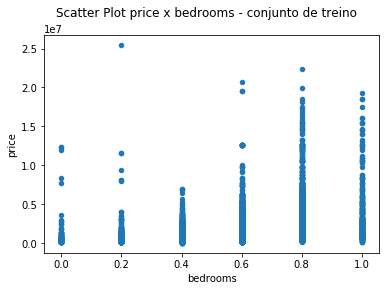

In [135]:
# SCATTER PLOT relacionado variável ao preço.
df_treino.plot.scatter(x='bedrooms', y='price')
plt.suptitle('Scatter Plot price x bedrooms - conjunto de treino')

## 2.26) yearlyIptu, monthlyCondoFee

* Variáveis de saída. 
* Não serão estudadas ou usadas.

# 3) Escolha do algoritmo de regressão

## 3.1) Métricas
* A métrica escolhida será a **mediana do erro absoluto (MAE)**:
    * Calcula o erro absoluto de cada instância e determina a mediana do resultado.
    * Insensível a outliers: oferece resultados mais confiáveis para imóveis cujos valores são mais fáceis de prever, mesmo que ao possível custo de errar mais em imóveis mais difíceis.
* Métrica auxiliar (para complementar a análise): R quardado (R2)
    * Fornece a proporção da variância dos dados explicada pelo modelo.
* Métrica auxiliar (para complementar a análise): média do erro quadrático (MSE)
    * Soma do quadrado dos erros.
    * Muito sensível a outliers (um bom modelo que erra apenas em outliers pode ser visto como um modelo ruim).

## 3.2) Algoritmos de Regressão
1. **Regressão Linear**
    * Pressupõe relação linear entre entradas e saídas.
    * Sabe-se que as variáveis 'lon' e 'lat', que seespera que sejam importantes, não apresentam relação linear com o preço.
    * O modelo não deve performar em, e será estado apenas para fins de comparação.
<br><br>
2. **Regressão por Árvores de Decisão**
    * Consegue lidar muito bem com entradas fora de esala, sem distribuição normal e sem relação linear com a saída, mas possui forte tendência ao overfitting.
    * Fornee a importânca de cada atributo: importante para feature selection.
    * Não serão testados diferentes hiperparâmetros: a princípio, busco modelos simples. Em um projeto real, seria necesaria uma nova etapa para refinamento do modelo.
<br><br>
3. **Regressão por k Vizinhos mais Próximos**
    * O valor previsto é a média dos k Vizinhos mais Próximos. 
    * Requer escalas normalizadas para não sobrevalorizar variáveis com maior escala.
    * Não requer proporção linear entre entradas e saídas
    * Será usado o default de k = 5 vizinhos.

## 3.3) Testes para escolha das features
1. Serão usadas apenas as features e target escolhidos na etapa 2, já devidamente pré-processadas.
2. Para cada modelo, serão calculadas as três métricas.
3. Haverão 100 testes aleatórios, o resultado de cada métrica é a média dos 100 resulados.
4. A importância de cada feature via Regressão por Árvore de Decisão também será a média dos 100 resultados.
5. As features mais importantes passam para a próxima etapa.

In [136]:
# Features.
X = df_treino[['usableAreas', 'parkingSpaces', 'lat', 'lon', 'locationId_zone_ZL', 'locationId_zone_ZN',  
               'locationId_zone_ZO', 'locationId_zone_ZS', 'suites', 'publicationType', 'bathrooms', 'bedrooms']]
X.head()

,usableAreas,parkingSpaces,lat,lon,locationId_zone_ZL,locationId_zone_ZN,locationId_zone_ZO,locationId_zone_ZS,suites,publicationType,bathrooms,bedrooms
id,,,,,,,,,,,,
6654d93423,-0.370807,0.285714,-0.778773,-0.563757,0,0,0,1,0.2,0,0.285714,0.6
9ffaf676ae,14.481554,0.714286,-0.453589,-0.076124,0,0,0,1,0.8,0,0.714286,0.8
f03e22422a,-0.210887,0.285714,-0.010006,-0.622331,0,0,1,0,0.0,0,0.142857,0.6
8e1922c386,0.325988,0.285714,-0.152114,0.327401,0,0,0,0,0.6,1,0.571429,0.8
690407f653,0.862863,0.428571,-1.543414,-1.371857,0,0,0,1,0.8,0,0.000000,0.8


In [137]:
# Traget.
y = df_treino[['price']]

In [138]:
# 100 experimentos: calcula métricas e feature importances.

n = 100
[r2_lnr, r2_dtr, r2_knr, mse_lnr, mse_dtr, mse_knr, mae_lnr, mae_dtr, mae_knr] = [0]*9

col_names = X.columns 
feat_imp = np.array([0]*len(col_names))

for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    lnr_model = LinearRegression()
    lnr_model.fit(X_train, y_train)
    y_pred = lnr_model.predict(X_test)
    r2_lnr = r2_lnr + r2_score(y_test, y_pred)
    mse_lnr = mse_lnr + mean_squared_error(y_test, y_pred)
    mae_lnr = mae_lnr + median_absolute_error(y_test, y_pred)
    
    dtr_model = DecisionTreeRegressor()
    dtr_model.fit(X_train, y_train)
    y_pred = dtr_model.predict(X_test)
    r2_dtr = r2_dtr + r2_score(y_test, y_pred)
    feat_imp = feat_imp + dtr_model.feature_importances_
    mse_dtr = mse_dtr + mean_squared_error(y_test, y_pred)
    mae_dtr = mae_dtr + median_absolute_error(y_test, y_pred)
    
    knr_model = KNeighborsRegressor()
    knr_model.fit(X_train, y_train)
    y_pred = knr_model.predict(X_test)
    r2_knr = r2_knr + r2_score(y_test, y_pred)
    mse_knr = mse_knr + mean_squared_error(y_test, y_pred)
    mae_knr = mae_knr + median_absolute_error(y_test, y_pred)
    
feat_imp = feat_imp/n

[r2_lnr, r2_dtr, r2_knr, mse_lnr, mse_dtr, mse_knr, mae_lnr, mae_dtr, mae_knr] = list(
    np.array([r2_lnr, r2_dtr, r2_knr, mse_lnr, mse_dtr, mse_knr, mae_lnr, mae_dtr, mae_knr])/n)

In [139]:
# Resultados das métricas.
results = pd.DataFrame({'r-sqared': [r2_lnr, r2_dtr, r2_knr],
                        'mean square error': [mse_lnr, mse_dtr, mse_knr],
                        'median absolute error': [mae_lnr, mae_dtr, mae_knr]},
                       index = ['LinearRegression','DecisionTreeRegressor','KNeighborsRegressor'])
results

,r-sqared,mean square error,median absolute error
LinearRegression,0.665403,3.409752e+11,135784.009153
DecisionTreeRegressor,0.856149,1.466363e+11,38548.823750
KNeighborsRegressor,0.861355,1.414154e+11,45558.585000


In [140]:
# Resultados das feature importances.
importances = pd.DataFrame(data = feat_imp, index=col_names)
importances

,0
usableAreas,0.714813
parkingSpaces,0.066718
lat,0.097182
lon,0.094071
locationId_zone_ZL,0.000093
locationId_zone_ZN,0.000153
locationId_zone_ZO,0.001315
locationId_zone_ZS,0.003850
suites,0.009662
publicationType,0.000530


### Conclusão:
* A DecisionTreeRegressor apresenta o melhor resultado de MAE até então, apesar de possuir desempenho inferior ao KNeighborsRegressor nas métricas auxiliares. Esta discussão será aprofundada mais adiante.
* Os features com maior importância, em ordem decrescente, são: 
    1. **usableAreas:** Este resultado era mais do que esperado: é bastante consolidado no mercado imobiliário que o preço de um imóvel possui dependência muito alta da sua área; além disto, a análise das variáveis já indicava uma forte correlação.
    2. **lat:** Também um resultado esperado: tanto pela análise das variáveis (ver histograma 2D acima no item 2.15), quanto pelp fato de que a localização de um imóvel costuma ter forte impacto pelo preço.
    3. **lon:** Idem anterior.
    4. **parkingSpaces:** Possui uma importância menor.
* As demais features possuem, no máximo, 1/7 da importância do parkingSpaces e não serão usadas.
    * suites, bathrooms e bedrooms apresentaram os melhores resultados, mas ainda muito abaixo do restante. Provavelmente, boa parte de sua informação já está contida em usableAreas (quanto mais suites, banheiros e quartos, maior a área). Por isso, serão excluídas.
    * publicationType acabou não contribuindo em quase nada e também será excluída.
    * As quatro variáveis com a zona também contribuem muito pouco. Provavelmente, boa parte da sua informação já está contida em lat e lon. Além disso, dividir uma cidade tão grande em apenas 5 zonas dificilmente seria capaz de ajudar na previsão do preço. Todas serão excluídas do modelo final.    

## 3.4) Testes para escolha do algoritmo
1. Serão usadas apenas as features e target escolhidos na etapa 3.3, já devidamente pré-processadas.
2. Para cada modelo, serão calculadas as três métricas.
3. Haverão 100 testes aleatórios, o resultado de cada métrica é a média dos 100 resulados.
4. O melhor algoritmo será usado para determinar o modelo final.

In [141]:
# Features.
X2 = df_treino[['usableAreas', 'parkingSpaces', 'lat', 'lon']]

In [142]:
# 100 experimentos: calcula métricas

n = 100
[r2_lnr, r2_dtr, r2_knr, mse_lnr, mse_dtr, mse_knr, mae_lnr, mae_dtr, mae_knr] = [0]*9

for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2)
    
    lnr_model = LinearRegression()
    lnr_model.fit(X_train, y_train)
    y_pred = lnr_model.predict(X_test)
    r2_lnr = r2_lnr + r2_score(y_test, y_pred)
    mse_lnr = mse_lnr + mean_squared_error(y_test, y_pred)
    mae_lnr = mae_lnr + median_absolute_error(y_test, y_pred)
    
    dtr_model = DecisionTreeRegressor()
    dtr_model.fit(X_train, y_train)
    y_pred = dtr_model.predict(X_test)
    r2_dtr = r2_dtr + r2_score(y_test, y_pred)
    mse_dtr = mse_dtr + mean_squared_error(y_test, y_pred)
    mae_dtr = mae_dtr + median_absolute_error(y_test, y_pred)

    knr_model = KNeighborsRegressor()
    knr_model.fit(X_train, y_train)
    y_pred = knr_model.predict(X_test)
    r2_knr = r2_knr + r2_score(y_test, y_pred)
    mse_knr = mse_knr + mean_squared_error(y_test, y_pred)
    mae_knr = mae_knr + median_absolute_error(y_test, y_pred)

[r2_lnr, r2_dtr, r2_knr, mse_lnr, mse_dtr, mse_knr, mae_lnr, mae_dtr, mae_knr] = list(
    np.array([r2_lnr, r2_dtr, r2_knr, mse_lnr, mse_dtr, mse_knr, mae_lnr, mae_dtr, mae_knr])/n)

In [143]:
# Resultados das métricas.
results = pd.DataFrame({'r-sqared': [r2_lnr, r2_dtr, r2_knr],
                        'mean square error': [mse_lnr, mse_dtr, mse_knr],
                        'median absolute error': [mae_lnr, mae_dtr, mae_knr]},
                       index = ['LinearRegression','DecisionTreeRegressor','KNeighborsRegressor'])
results

,r-sqared,mean square error,median absolute error
LinearRegression,0.645836,3.597314e+11,131617.102667
DecisionTreeRegressor,0.870542,1.311999e+11,36509.657851
KNeighborsRegressor,0.884531,1.173222e+11,41108.616000


### Conclusão:
* Observa-se que a exclusão de features sem importância melhorou o resultado das métricas.
* O DecisionTreeRegressor apresenta o melhor resultado de MAE , apesar de possuir desempenho inferior ao KNeighborsRegressor nas métricas auxiliares. 
* Em relação ao DecisionTreeRegressor, o KNeighborsRegressor apresenta um MSE 10% menor e um MAE 13% maior.
* Aparentemente, o DecisionTreeRegressor acerta os fáceis e erra os difíceis, motivo pelo qual possui menor mediana de erro com maior média de erro quadrático. 
* A Regressão Linear performa notavelmente pior, provavelmente porque as features lat e lon não possuem relação linear.
* **O modelo escolhido, que possui menor MAE, é então o DecisionTreeRegressor.**

# 4) Construção do modelo e previsão

1. O modelo final usará todos os dados do conjunto de treino.
2. Ele será usado para prever cada instância do conj. de teste.
3. O resultado será armazenado em um arquivo csv.

In [144]:
# Features e targets.
[X_train, X_test, y_train] = [X2, df_teste[['usableAreas', 'parkingSpaces', 'lat', 'lon']], y]

In [145]:
# Treinando o modelo.
final_model = DecisionTreeRegressor(random_state=0)
final_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [146]:
# Prevendo o target.
y_pred = final_model.predict(X_test)

Text(0.5,0.98,'Histograma de preços previstos do conj. de testes')

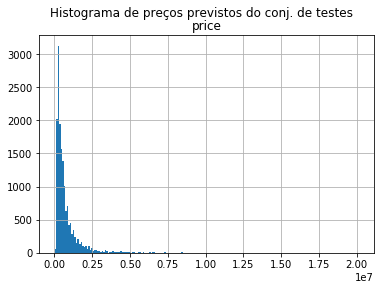

In [147]:
# Armazena resultados em um DataFrame e exibe um histograma.
df_results = pd.DataFrame(data=y_pred, columns=['price'], index=df_teste.index)
df_results.hist(bins=200)
plt.suptitle('Histograma de preços previstos do conj. de testes')

In [148]:
df_results.to_csv(r'results.csv')

# 5) Perguntas

### 5.1) Você utilizaria a métrica escolhida para seleção de modelo também para comunicar os resultados para usuários e stakeholders internos? Em caso negativo, qual outra métrica você utilizaria nesse caso?
Com certeza, a escolha das métricas (ver 3.1 para explicações) teve em vista possíveis usuários e stakeholders internos.

### 5.2) Em quais bairros ou em quais faixas de preço o seu modelo performa melhor?
O menor erro absoluto médio ocorre na Zona Norte, enquanto que o maior ocorre na Zona Sul.

In [149]:
df = df_treino[['locationId_zone', 'price']].copy()
df['price_pred'] = final_model.predict(X_train)
df['abs_error'] = abs(df.price - df.price_pred)
a = df.groupby('locationId_zone')['abs_error'].mean()
a = pd.DataFrame(data=a, columns=['abs_error'])
a.sort_values(by='abs_error')

,abs_error
locationId_zone,
Zona Norte,9699.637617
Zona Leste,13134.889196
Zona Oeste,13987.609572
Centro,20426.354760
Zona Sul,23923.251376


### 5.3) Se você tivesse que estimar o valor dos imóveis com apenas 3 campos, quais seriam eles?
Seriam usableAreas, lon e lat, conforme explicado em 3.3.

### 5.4) Como você vislumbra colocar a sua solução em produção?
1. Construir uma API que carrega dados das quatro variáveis escolhidas (usableAreas, lat, lon e parkingSpaces) e realiza as transformações indicadas nos itens 2.4, 2.8 e 2.15.
2. Implementar o modelo do item 4 que estima o preço tendo como entrada os dados do item anterior.
3. Observação: ainda seriam necessárias etapas para:
    * Compreender melhor os preços da variável price, ara que se possa préprocessá-los de maneira mais adequada. Ainda é provável que haja instâncias com erros no target price.
    * Refinar o modelo através do ajuste de hiperparâmetros, ou mesmo através do uso do algoritmo RandonForests.
    * Realizar mais testes para verificar a confiabilidade do modelo.
    * Talvez seja possível realizar um agrupamento de bairros usando um método como PCA, para criar features baseadas em grupos de features. O mesmo talvez seja possível para bairros, zipCodes e publisherId. O presente trabalho, entretanto, não se aprofunda nestes temas.